In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

from sklearn import tree




   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0  


In [5]:
file = pd.read_csv('heart.csv')
df  = (pd.DataFrame(file))
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [11]:
le=LabelEncoder()
columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
for i in columns:
  df[i] = le.fit_transform(df[i])
print(df.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0  
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
   

In [12]:
x = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

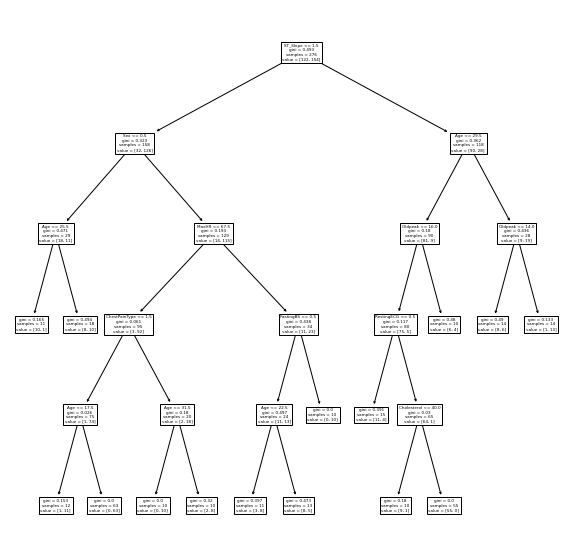

In [13]:
X_test,X_train,y_test,y_train = train_test_split(x,y,test_size=0.3 , random_state=100)
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_leaf=10)
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
clf_gini.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 10)) #figsize value changes the size of plot
tree.plot_tree(clf_gini,ax=ax,feature_names=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak' , 'ST_Slope'])
plt.show()